In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving SaYoPillow.csv to SaYoPillow.csv


In [3]:
import io
sdata = pd.read_csv(io.BytesIO(data_to_load['StressThroughSleep.csv']))

In [4]:
sdata

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,body_oxygen_level,eye_movement,hours_of_sleep,heart_rate,stress_level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [5]:
sdata.isnull().sum()

snoring_range         0
respiration_rate      0
body_temperature      0
limb_movement_rate    0
body_oxygen_level     0
eye_movement          0
hours_of_sleep        0
heart_rate            0
stress_level          0
dtype: int64

In [6]:
sdata["stress_level"].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

Text(0.5, 1.0, 'Heatmap of Correlation')

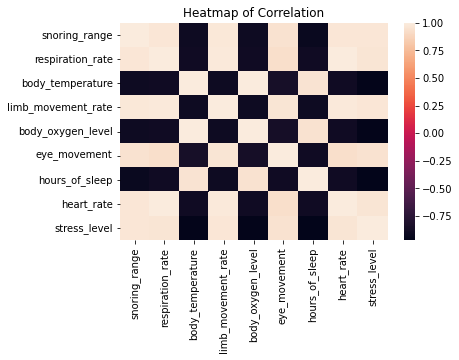

In [7]:
corr = sdata.corr()
plt.figure(figsize=(6,4))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [28]:
X = sdata.drop(columns="stress_level")
Y = sdata["stress_level"]

In [29]:
features = SelectKBest(score_func=chi2,k='all')
fit = features.fit(X,Y)

In [30]:
sleep_scores = pd.DataFrame(fit.scores_)
sleep_columns = pd.DataFrame(X.columns)

In [31]:
featureScores = pd.concat([sleep_columns,sleep_scores],axis=1)
featureScores.columns = ['Specifications','Score']

In [32]:
print(featureScores.nlargest(8,'Score'))

       Specifications        Score
0       snoring_range  3182.907821
6      hours_of_sleep  1525.621622
3  limb_movement_rate   945.538462
5        eye_movement   936.101695
7          heart_rate   913.255814
1    respiration_rate   432.330275
4   body_oxygen_level    98.693069
2    body_temperature    79.157328


In [33]:
X = sdata.drop(columns = ['body_temperature','body_oxygen_level'])
Y = sdata['stress_level']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify =Y,random_state =100)

In [39]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(441, 7)
(441,)
(189, 7)
(189,)


**One Vs Rest Classifier**

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
orc_clf = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
y_pred = orc_clf.predict(X_test)
print("Accuracy:  %1.3f" % (accuracy_score(Y_test, y_pred)))

Accuracy:  0.603


**One vs One Classifier**

In [59]:
from sklearn.multiclass import OneVsOneClassifier
ooc_clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

In [73]:
y_pred = ooc_clf.predict(X_test)
print("Accuracy:  %1.3f" % (accuracy_score(Y_test, y_pred)))

Accuracy:  1.000


**Output Code Classifier using Linear SVC**

In [56]:
from sklearn.multiclass import OutputCodeClassifier
occ_clf = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state =1).fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

In [72]:
y_pred = occ_clf.predict(X_test)
print("Accuracy:  %1.3f" % (accuracy_score(Y_test, y_pred)))

Accuracy:  0.889
